In [63]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import PCA
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import ElementwiseProduct

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from utilities.utils import load_sns_theme

In [3]:
df = pd.read_csv("data\superconductivity.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


Session

In [77]:
spark = SparkSession.builder \
        .appName("SimplePySparkExample") \
        .getOrCreate()

In [78]:
df_spark = spark.createDataFrame(df)
df_spark.show()

+------------------+----------------+--------------------+-----------------+---------------------+-------------------+-----------------------+-----------------+---------------------+----------------+-------------------+--------+----------------+----------------+----------------+----------------+-----------------+---------+----------------+----------------+----------------+------------------+----------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+-----------------+---------------------+------------+----------------+----------------+-----------------+-----------------+-------------------+-------------+-----------------+----------------+----------------+---------------------+-------------------------+----------------------+--------------------------+------------------------+----------------------------+----------------------+--------------------------+--------------------+---------------

In [79]:
feature_cols = list(df_spark.columns[0:])
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [80]:
assembled_df = assembler.transform(df_spark)

In [81]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=True)
scaled_df = scaler.fit(assembled_df).transform(assembled_df)

In [82]:
pca = PCA(k=3, inputCol="scaledFeatures", outputCol="pcaFeatures")
pca_model = pca.fit(scaled_df)
pca_result = pca_model.transform(scaled_df)

In [83]:
pca_result.show()

+------------------+----------------+--------------------+-----------------+---------------------+-------------------+-----------------------+-----------------+---------------------+----------------+-------------------+--------+----------------+----------------+----------------+----------------+-----------------+---------+----------------+----------------+----------------+------------------+----------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+-----------------+---------------------+------------+----------------+----------------+-----------------+-----------------+-------------------+-------------+-----------------+----------------+----------------+---------------------+-------------------------+----------------------+--------------------------+------------------------+----------------------------+----------------------+--------------------------+--------------------+---------------

In [84]:
pca_model

PCAModel: uid=PCA_04cba6949fbf, k=3

In [85]:
pca_coefficients = pca_model.pc.toArray()
#pca_coefficients

In [87]:
for feature in zip(df.columns, pca_coefficients):
    print(feature[0], feature[1][0])

number_of_elements -0.15480509430951794
mean_atomic_mass 0.05105309878266362
wtd_mean_atomic_mass 0.09820610225948265
gmean_atomic_mass 0.0823302583335353
wtd_gmean_atomic_mass 0.11887078112671795
entropy_atomic_mass -0.1454471783730388
wtd_entropy_atomic_mass -0.15557963284939122
range_atomic_mass -0.1237151888946012
wtd_range_atomic_mass 0.08728373673872708
std_atomic_mass -0.09783535795361699
wtd_std_atomic_mass -0.11172626105177608
mean_fie -0.056063897189356185
wtd_mean_fie -0.12773361435521424
gmean_fie -0.02274271827074078
wtd_gmean_fie -0.11617714341977527
entropy_fie -0.15549120718544657
wtd_entropy_fie -0.10922543966509653
range_fie -0.16278269975128945
wtd_range_fie -0.08449799872462394
std_fie -0.1540907532268271
wtd_std_fie -0.16225561689630916
mean_atomic_radius 0.02005931716543393
wtd_mean_atomic_radius 0.1183799820224711
gmean_atomic_radius 0.077335959812623
wtd_gmean_atomic_radius 0.1366476191691395
entropy_atomic_radius -0.15230737234437
wtd_entropy_atomic_radius -0.1

In [88]:
feat_coeff = {feature: coefficient[0] for feature, coefficient in zip(df.columns, pca_coefficients)}
feat_coeff = dict(sorted(feat_coeff.items(), key=lambda x: abs(x[1]), reverse=True))
feat_coeff

{'range_fie': -0.16278269975128945,
 'range_atomic_radius': -0.16253131255611064,
 'wtd_entropy_atomic_radius': -0.1623089926604424,
 'wtd_std_fie': -0.16225561689630916,
 'wtd_std_atomic_radius': -0.15936485443616574,
 'entropy_Valence': -0.15770718742674653,
 'wtd_entropy_atomic_mass': -0.15557963284939122,
 'entropy_fie': -0.15549120718544657,
 'wtd_entropy_Valence': -0.15497111081224782,
 'number_of_elements': -0.15480509430951794,
 'wtd_gmean_Density': 0.15439121314343782,
 'std_fie': -0.1540907532268271,
 'entropy_atomic_radius': -0.15230737234437,
 'gmean_Density': 0.14934174842597006,
 'std_atomic_radius': -0.14865190184951108,
 'wtd_gmean_Valence': 0.1459692678481808,
 'entropy_atomic_mass': -0.1454471783730388,
 'wtd_mean_Valence': 0.1440352986318027,
 'range_ThermalConductivity': -0.14301284127478178,
 'wtd_entropy_FusionHeat': -0.1422406213806208,
 'gmean_Valence': 0.14034960233789912,
 'mean_Valence': 0.13911262647961364,
 'entropy_ElectronAffinity': -0.13873215402149247,


Plot

In [89]:
y = pd.DataFrame(df["critical_temp"])

In [60]:
# dim_0 = [feature[0] for feature in pca_coefficients]
# dim_1 = [feature[1] for feature in pca_coefficients]

In [90]:
# Estrai le componenti principali come un DataFrame
pca_result = pca_model.transform(scaled_df).select("pcaFeatures").collect()

# Estrai i valori delle componenti principali come una lista di tuple
pca_values = [tuple(row.pcaFeatures.toArray()) for row in pca_result]

# Trasponi la lista di tuple
pca_transposed = list(zip(*pca_values))

In [91]:
len(pca_transposed)

3

In [92]:
load_sns_theme(r"utilities\themes\fire_theme.json")

{'figure.facecolor': '#202021',
 'axes.facecolor': '#262626',
 'axes.edgecolor': '#cfcfd1',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#ffffff',
 'ytick.color': '#ffffff',
 'axes.labelcolor': '#ffffff'}

C:\Users\feder\AppData\Local\Temp\ipykernel_23220\1823540348.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)


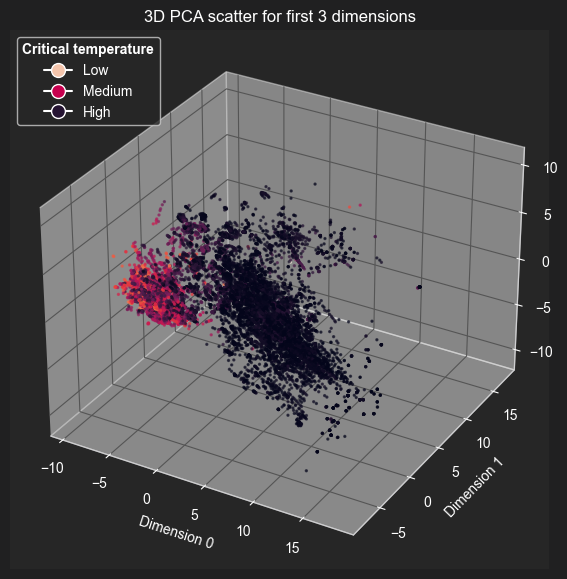

In [93]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_transposed[0], ys=pca_transposed[1], zs=pca_transposed[2],
           c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)

ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
ax.set_title('3D PCA scatter for first 3 dimensions', color="white")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#f5c5ac', markersize=10, label='Low'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#c6004e', markersize=10, label='Medium'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#251432', markersize=10, label='High')
]

legend = ax.legend(handles=legend_elements, title="Critical temperature", loc='upper left', labels=['Low', 'Medium', 'High'])
for text in legend.get_texts():
    text.set_color('white')
legend.get_title().set_color('white')
legend.get_title().set_weight('bold')